In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [18]:
df=pd.read_csv(r"F:\Jupyter\data_jobs.csv")
df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [19]:
df[df['job_title_short'] == 'Data Analyst']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,NaN,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,NaN,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,NaN,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,NaN,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,NaN,NaN,NaN,Axelon Services Corporation,NaN,NaN
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,NaN,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,NaN,NaN,NaN,Amul,NaN,NaN
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}"


In [20]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)


In [21]:
skill_stats

,skill_count,median_salary
job_skills,,
airflow,45254,147090.5
airtable,296,102500.0
alteryx,12297,115000.0
angular,5354,130000.0
angular.js,115,127050.0
...,...,...
wrike,73,101250.0
wsl,96,NaN
xamarin,62,121250.0


In [22]:
skill_count=20
skill_stats=skill_stats.sort_values(by='skill_count',ascending=False).head(skill_count)

In [23]:
skill_stats

,skill_count,median_salary
job_skills,,
sql,384849,120000.0
python,380909,125000.0
aws,145381,135000.0
azure,132527,125000.0
r,130892,119550.0
tableau,127213,111175.0
excel,127018,92500.0
spark,114609,140000.0
power bi,98147,102000.0


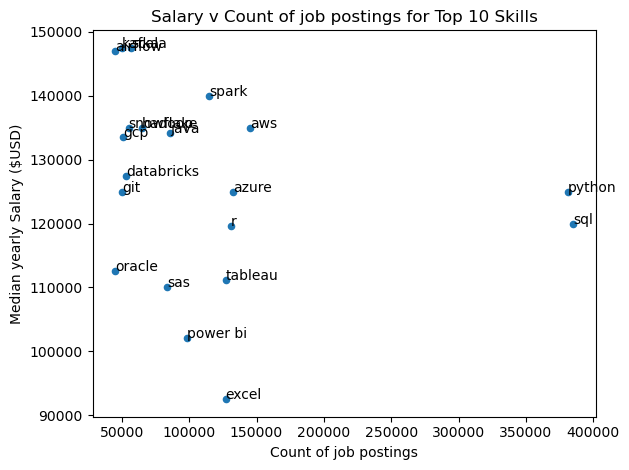

In [24]:
#Now we are gonna add a label to the points using text fucnction

skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('Count of job postings')
plt.ylabel('Median yearly Salary ($USD)')
plt.title('Salary v Count of job postings for Top 10 Skills')

for i,txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt)

plt.tight_layout()
plt.show()

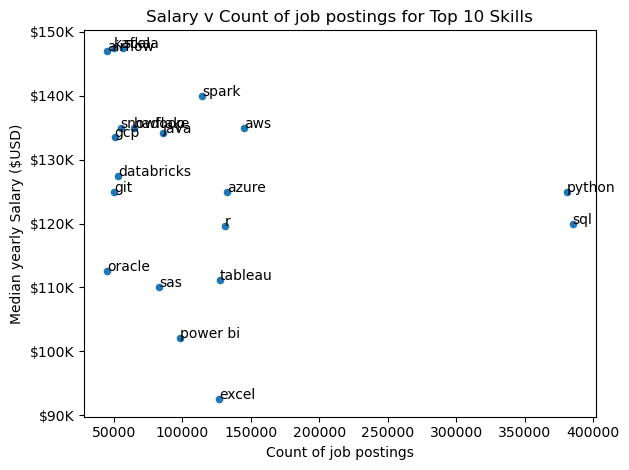

In [29]:
#Formatting the yaxis

skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('Count of job postings')
plt.ylabel('Median yearly Salary ($USD)')
plt.title('Salary v Count of job postings for Top 10 Skills')

for i,txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt)

ax =plt.gca()
#To access the axes of the plot...we introduced the first line fig,ax ...and now the above line gca denotes (get
#current axis)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'${int(y/1000)}K'))
#Here we are mentioning that we wanna format the yxis..thereby using funcformatter class ...have to use specifically with
# lambda function (inside this ..pos means position) the above code prints the same old yaxis values
#if u print pos - (lambda y,pos:pos) - it returns 1 , 2 , 3 ...kind of an index

plt.tight_layout()
plt.show()

In [9]:
# Now we are gonna clean the viz since the names are overlapping each other using "adjustText" function

In [16]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('Count of job postings')
plt.ylabel('Median yearly Salary ($USD)')
plt.title('Salary v Count of job postings for Top 10 Skills')

#create a list here to execute below adjustText function
texts=[]

for i,txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt))

#have to put adjustext in here after the line thats generating the text
adjust_text(texts)

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'adjustText'

In [ ]:
# The above code actually made some spaces in the viz as we expected

In [ ]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('Count of job postings')
plt.ylabel('Median yearly Salary ($USD)')
plt.title('Salary v Count of job postings for Top 10 Skills')

#create a list here to execute below adjustText function
texts=[]

for i,txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt))

#have to put adjustext in here after the line thats generating the text
adjust_text(texts,arrowprops=dict(arrowstyle="->",color = "gray" , lw = 1))
#this arrowprops argument provides arrows to the names to make it more clearer

plt.tight_layout()
plt.show()